# AI-Based Behavioral Clustering of Instagram Users  

Ever wondered how people use Instagram differently? Some scroll for hours, some just check notifications, and some barely open the app at all. This project is all about clustering Instagram users based on how often they visit and how engange they are on the platform.


### Instagram Users: Addicted, Casual, or Unbother?

In [ ]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.cluster import KMeans   
from sklearn.preprocessing import MinMaxScaler  
from yellowbrick.cluster import KElbowVisualizer  
from sklearn.metrics import silhouette_score  
import warnings
warnings.filterwarnings("ignore")  

import numpy as np  #Numerical operations, arrays, and vectorized math.

import pandas as pd  #Data manipulation using DataFrames and Series

import matplotlib.pyplot as plt  #Plotting graphs and charts (basic visualizations)

import seaborn as sns  #Advanced statistical visualizations

from sklearn.cluster import KMeans   #Clustering data into K groups using the K-Means algorithm

from sklearn.preprocessing import MinMaxScaler  #Scaling features to a 0–1 range for better model performance

from yellowbrick.cluster import KElbowVisualizer  # Visual tool to find the optimal number of clusters using the Elbow method

from sklearn.metrics import silhouette_score  # Evaluates clustering quality based on how well points fit within their cluster

import warnings

warnings.filterwarnings("ignore")  #Suppresses warning messages to keep output clean

In [51]:
#load dataset file 
user_data = pd.read_csv(r'C:\Users\bhumi\Desktop\AI capstone project\my capstone 1\Instagram visits clustering.csv')

#to display first few lines
user_data.head()

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397


In [52]:
# check duplicated row
print(f'Duplicated row: {user_data.duplicated().sum()}')

Duplicated row: 0


In [53]:
# check dataset information
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User ID                  2600 non-null   int64  
 1   Instagram visit score    2600 non-null   int64  
 2   Spending_rank(0 to 100)  2600 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 61.1 KB


In [54]:

#calculate statistics of a DataFrame
user_data.describe().T           #Transpose use for enhance readability

,count,mean,std,min,25%,50%,75%,max
User ID,2600.0,1299.500000,750.699674,0.000000,649.750000,1299.500000,1949.250000,2599.000000
Instagram visit score,2600.0,63.323462,26.579760,5.000000,38.000000,72.000000,86.000000,118.000000
Spending_rank(0 to 100),2600.0,42.848408,28.758349,0.940709,19.452098,28.013082,72.116945,107.349821


In [55]:
#check null values
user_data.isnull().sum()

User ID                    0
Instagram visit score      0
Spending_rank(0 to 100)    0
dtype: int64

In [56]:
#data type for each columns
user_data.dtypes

User ID                      int64
Instagram visit score        int64
Spending_rank(0 to 100)    float64
dtype: object

In [57]:
#check duplicate values
user_data.duplicated().sum()

np.int64(0)

check dataset statistics summary

2600 rows, 3 columns

No duplicated row

No missing value

No categorical feature (all numeric)

In [58]:
numeric_columns = ['Instagram visit score', 'Spending_rank(0 to 100)']

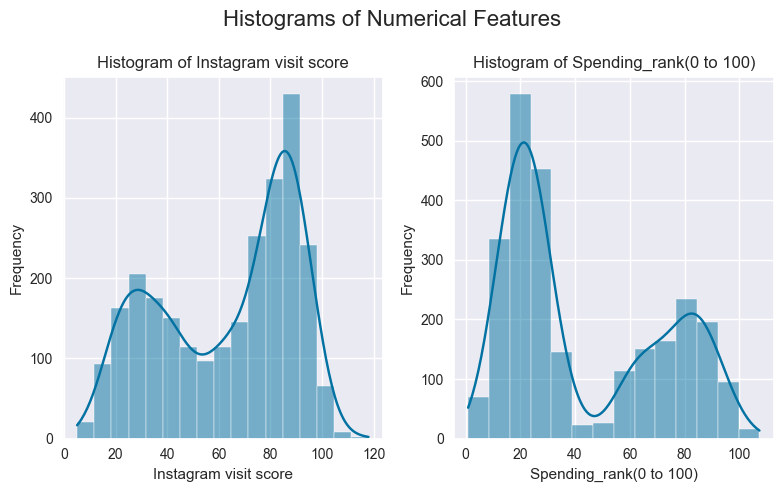

In [82]:
# ===========================
# check features distribution
# ===========================

# create grid size
rows, cols = 1, 2

# create figure and subplots
plt.figure(figsize=(8, 5))

# plot each feature in subplot
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(user_data[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.ylabel('Frequency')

# layout
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

<Axes: xlabel='Instagram visit score', ylabel='Spending_rank(0 to 100)'>

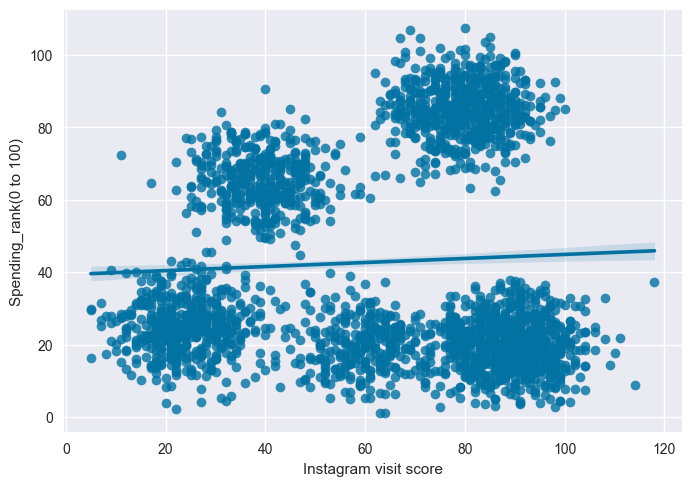

In [60]:
# ==================================
# check correlation between features
# ==================================
sns.set_style('darkgrid')
sns.regplot(x='Instagram visit score', y='Spending_rank(0 to 100)', data=user_data)

In [ ]:
# normalization features using min-max scaler
scaler = MinMaxScaler()   # scaler transforms features by scaling each value to a given range, usually [0, 1].
user_data_scaled = user_data.copy()
user_data_scaled[numeric_columns] = scaler.fit_transform(user_data[numeric_columns])

### Data Preprocessing

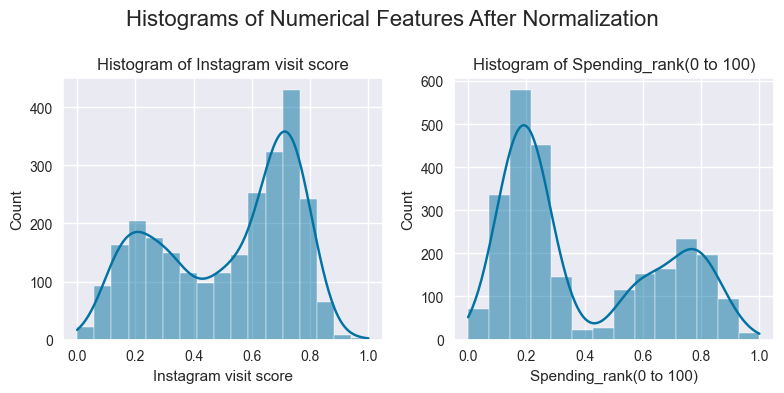

In [84]:

# ===============================================
# check features distribution after normalization
# ===============================================

# create grid size
rows, cols = 1, 2

# create figure and subplots
plt.figure(figsize=(8, 4))

# plot each feature in subplot
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(user_data_scaled[col], kde=True)
    plt.title(f"Histogram of {col}")

# layout
plt.suptitle("Histograms of Numerical Features After Normalization", fontsize=16)
plt.tight_layout()
plt.show()

In [63]:
# =============
# check outlier
# =============

for col in numeric_columns:

    #first quartile (Q1)
    Q1 = user_data[col].quantile(0.25)

    #third quartile (Q3)
    Q3 = user_data[col].quantile(0.75)
    
    #Interquartile Range (IQR), majority of the data points lie
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = user_data[(user_data[col] < lower_bound) | (user_data[col] > upper_bound)]
    print(outliers)
    
    user_data = user_data.drop(outliers.index)

Empty DataFrame
Columns: [User ID, Instagram visit score, Spending_rank(0 to 100)]
Index: []
Empty DataFrame
Columns: [User ID, Instagram visit score, Spending_rank(0 to 100)]
Index: []


Insights:

No outlier

Both features has multimodal distribution

Both features has a slight positive correlation to each other

Moreover, both plot is indicating clusters existence itself!

### Model Training

#### Model Initialization

In [64]:
# create variable for dataset we will use in modeling
X = user_data_scaled.copy()
X = X.drop('User ID', axis=1)

In [65]:
model_1 = KMeans(random_state=0)
model_1.fit(X)

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [66]:
# get cluster labels
labels = model_1.labels_
 
# number of cluster
k = len(model_1.cluster_centers_)
 
# create function for analyzing characteristics of each cluster
def analyze_clusters(X, labels, k):
    print("Characteristics of Each Cluster:")
    for cluster_id in range(k):
        # get current cluster data
        cluster_data = X[labels == cluster_id]
 
        # get means for each feature in cluster
        print(f'\nCluster {cluster_id + 1}:')
        mean_values = cluster_data.mean()  # use .mean() from pandas
        for col in X.columns:
            print(f'Mean of {col}: {mean_values[col]:.2f}')

# analyze characteristics of each cluster
analyze_clusters(X, labels, k)

Characteristics of Each Cluster:

Cluster 1:
Mean of Instagram visit score: 0.66
Mean of Spending_rank(0 to 100): 0.79

Cluster 2:
Mean of Instagram visit score: 0.48
Mean of Spending_rank(0 to 100): 0.18

Cluster 3:
Mean of Instagram visit score: 0.32
Mean of Spending_rank(0 to 100): 0.55

Cluster 4:
Mean of Instagram visit score: 0.79
Mean of Spending_rank(0 to 100): 0.19

Cluster 5:
Mean of Instagram visit score: 0.19
Mean of Spending_rank(0 to 100): 0.27

Cluster 6:
Mean of Instagram visit score: 0.28
Mean of Spending_rank(0 to 100): 0.66

Cluster 7:
Mean of Instagram visit score: 0.14
Mean of Spending_rank(0 to 100): 0.18

Cluster 8:
Mean of Instagram visit score: 0.68
Mean of Spending_rank(0 to 100): 0.16


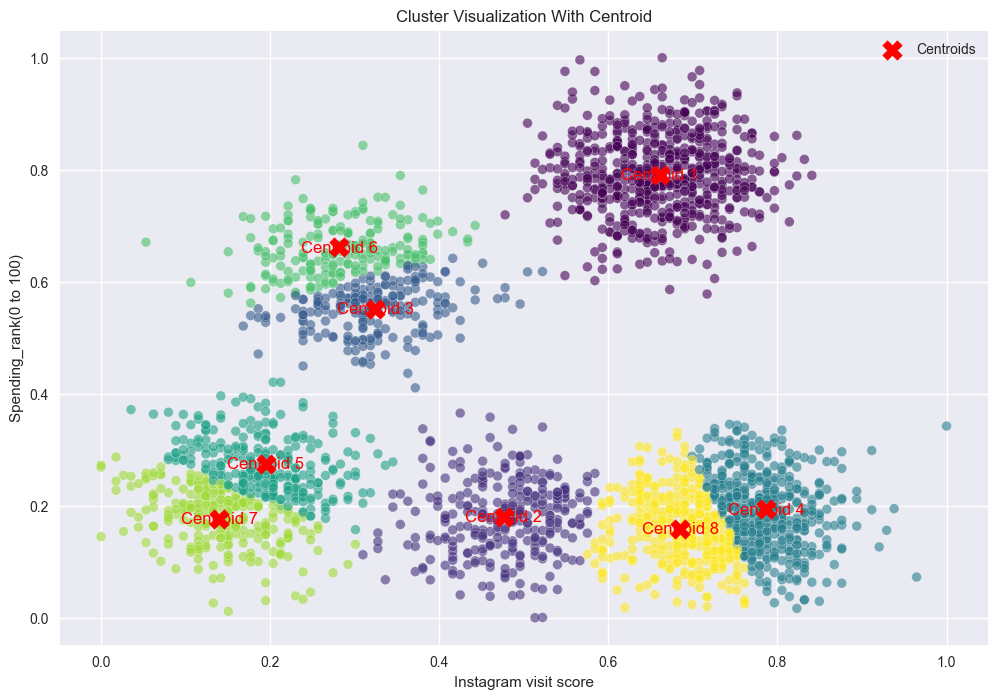

Centroids Value:
Centroid 1: Instagram visit score = 0.66, Spending_rank(0 to 100) = 0.79
Centroid 2: Instagram visit score = 0.48, Spending_rank(0 to 100) = 0.18
Centroid 3: Instagram visit score = 0.32, Spending_rank(0 to 100) = 0.55
Centroid 4: Instagram visit score = 0.79, Spending_rank(0 to 100) = 0.19
Centroid 5: Instagram visit score = 0.20, Spending_rank(0 to 100) = 0.27
Centroid 6: Instagram visit score = 0.28, Spending_rank(0 to 100) = 0.66
Centroid 7: Instagram visit score = 0.14, Spending_rank(0 to 100) = 0.18
Centroid 8: Instagram visit score = 0.69, Spending_rank(0 to 100) = 0.16


In [67]:
# create numpy array of X for plotting purpose
X_np = np.array(X)

# get centroid position
centroids = model_1.cluster_centers_

# visualize cluster
plt.figure(figsize=(12, 8))
 
# plot data
plt.scatter(X_np[:, 0], X_np[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
 
# plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# add centroid label on plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')
 
# add title and label
plt.title('Cluster Visualization With Centroid')
plt.xlabel('Instagram visit score')
plt.ylabel('Spending_rank(0 to 100)')
plt.legend()
 
plt.show()
 
# print centroid value
print("Centroids Value:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Instagram visit score = {centroid[0]:.2f}, Spending_rank(0 to 100) = {centroid[1]:.2f}")

In [68]:
model_1.fit(X)
silhouette_score(X, model_1.fit_predict(X))

0.4154262764285622

Based on above plot, I think 8 clusters are too much. 5 is enough, I guess.

So, let's check the optimal cluster numbers with elbow method.

### Evaluation Using Elbow Method

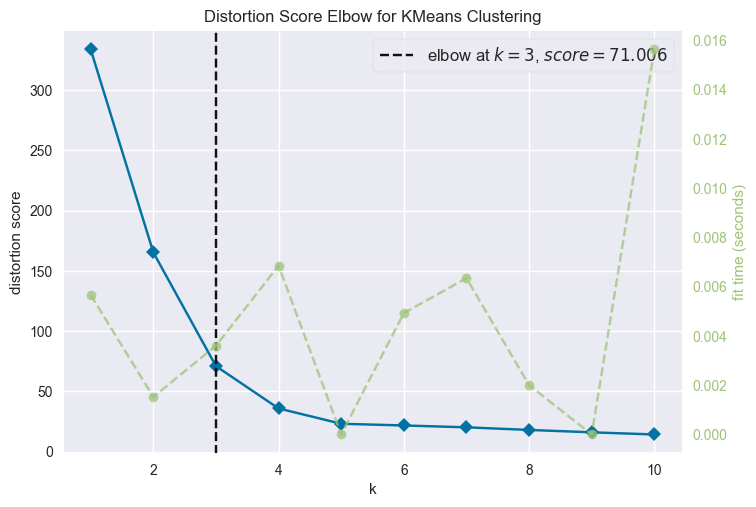

In [69]:
# initialize KElbow visualizer for getting optimal cluster number
visualizer = KElbowVisualizer(model_1, k=(1, 11))
 
# Fit visualizer with data
visualizer.fit(X)
 
# show elbow plot for analysis
visualizer.show()
plt.show()

#### Refining Model

In [70]:
model_2 = KMeans(n_clusters=3, random_state=0)
model_2.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [71]:
# get cluster labels
labels = model_2.labels_
 
# number of cluster
k = len(model_2.cluster_centers_)
 
# create function for analyzing characteristics of each cluster
def analyze_clusters(X, labels, k):
    print("Characteristics of Each Cluster:")
    for cluster_id in range(k):
        # get current cluster data
        cluster_data = X[labels == cluster_id]
 
        # get means for each feature in cluster
        print(f'\nCluster {cluster_id + 1}:')
        mean_values = cluster_data.mean()  # use .mean() from pandas
        for col in X.columns:
            print(f'Mean of {col}: {mean_values[col]:.2f}')

# analyze characteristics of each cluster
analyze_clusters(X, labels, k)

Characteristics of Each Cluster:

Cluster 1:
Mean of Instagram visit score: 0.63
Mean of Spending_rank(0 to 100): 0.78

Cluster 2:
Mean of Instagram visit score: 0.69
Mean of Spending_rank(0 to 100): 0.18

Cluster 3:
Mean of Instagram visit score: 0.23
Mean of Spending_rank(0 to 100): 0.36


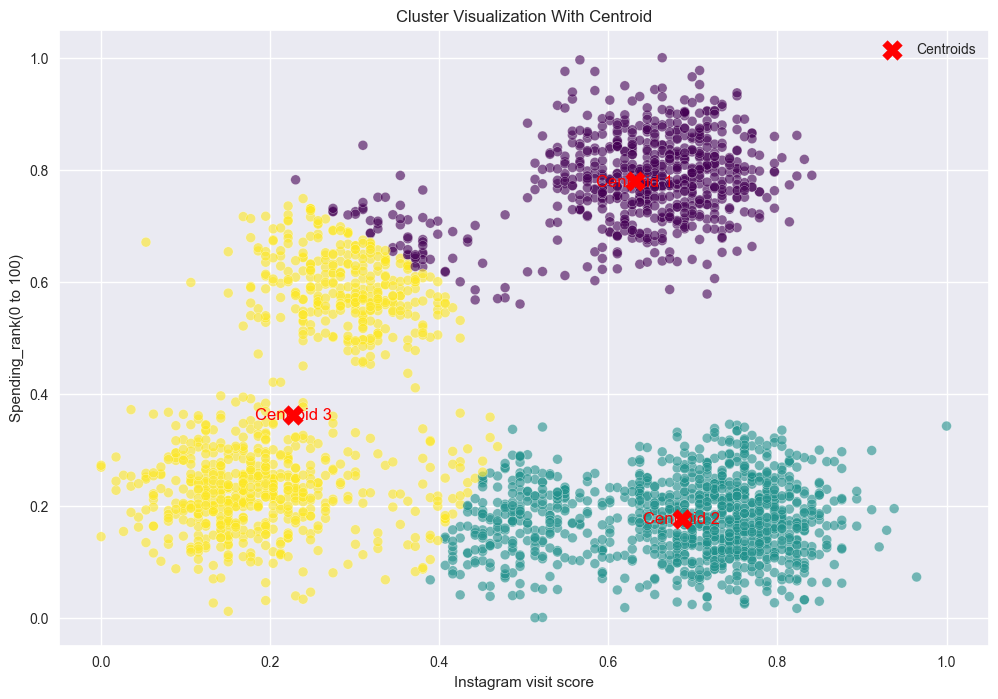

Centroids Value:
Centroid 1: Instagram visit score = 0.63, Spending_rank(0 to 100) = 0.78
Centroid 2: Instagram visit score = 0.69, Spending_rank(0 to 100) = 0.18
Centroid 3: Instagram visit score = 0.23, Spending_rank(0 to 100) = 0.36


In [72]:
# create numpy array of X for plotting purpose
X_np = np.array(X)

# get centroid position
centroids = model_2.cluster_centers_

# visualize cluster
plt.figure(figsize=(12, 8))
 
# plot data
plt.scatter(X_np[:, 0], X_np[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
 
# plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# add centroid label on plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')
 
# add title and label
plt.title('Cluster Visualization With Centroid')
plt.xlabel('Instagram visit score')
plt.ylabel('Spending_rank(0 to 100)')
plt.legend()
 
plt.show()
 
# print centroid value
print("Centroids Value:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Instagram visit score = {centroid[0]:.2f}, Spending_rank(0 to 100) = {centroid[1]:.2f}")

In [73]:
# evaluate model_2
silhouette_score(X, model_2.fit_predict(X))

0.5900801094240046

Model 2 is not performing too well. Let's build another one. How about trying on k=4?

In [74]:
model_3 = KMeans(n_clusters=4, random_state=0)
model_3.fit(X)


,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [75]:
silhouette_score(X, model_3.fit_predict(X))

0.6442627186774427

Ah! The silhouette score is much better now!! Elbow method is not always better for optimal cluster number evaluation then (at least in this case)?

#### Result Visualization

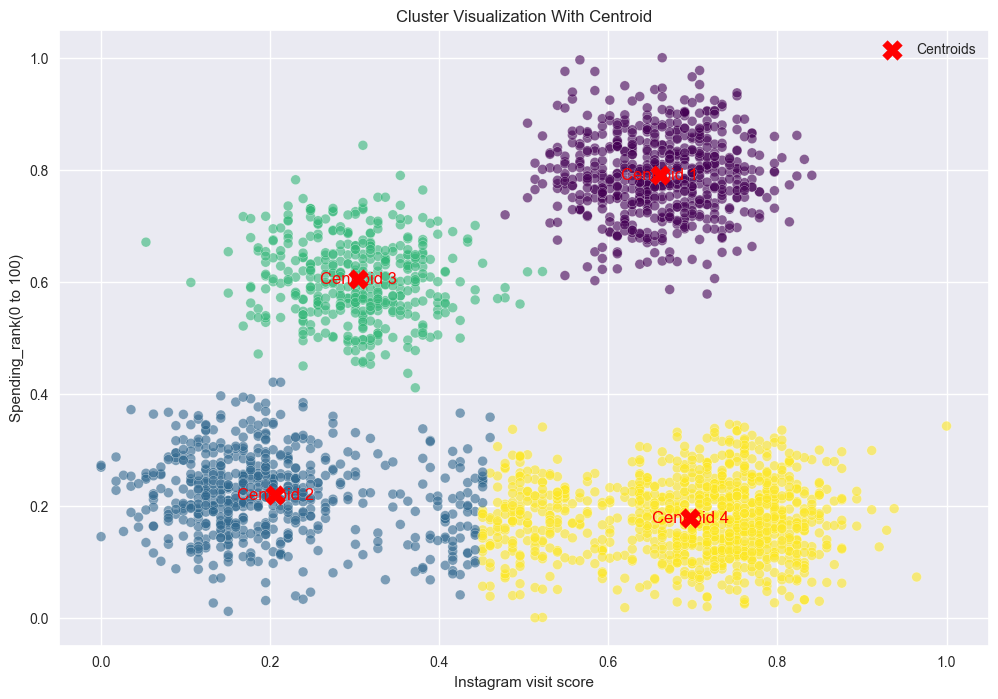

Centroids Value:
Centroid 1: Instagram visit score = 0.66, Spending_rank(0 to 100) = 0.79
Centroid 2: Instagram visit score = 0.21, Spending_rank(0 to 100) = 0.22
Centroid 3: Instagram visit score = 0.30, Spending_rank(0 to 100) = 0.60
Centroid 4: Instagram visit score = 0.70, Spending_rank(0 to 100) = 0.18


In [76]:
# get cluster labels
labels = model_3.labels_

# create numpy array of X for plotting purpose
X_np = np.array(X)

# get centroid position
centroids = model_3.cluster_centers_

# visualize cluster
plt.figure(figsize=(12, 8))
 
# plot data
plt.scatter(X_np[:, 0], X_np[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
 
# plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# add centroid label on plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')
 
# add title and label
plt.title('Cluster Visualization With Centroid')
plt.xlabel('Instagram visit score')
plt.ylabel('Spending_rank(0 to 100)')
plt.legend()
 
plt.show()
 
# print centroid value
print("Centroids Value:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Instagram visit score = {centroid[0]:.2f}, Spending_rank(0 to 100) = {centroid[1]:.2f}")

### Analysis & Conclusion

In [77]:
X['Cluster'] = model_3.labels_ + 1
X.insert(0, 'User ID', user_data['User ID']) # 0 means first col position
X.head(3)

,User ID,Instagram visit score,Spending_rank(0 to 100),Cluster
0,0,0.513274,0.217181,4
1,1,0.495575,0.228200,4
2,2,0.876106,0.165282,4


In [78]:
X.groupby(['Cluster'])[['Instagram visit score', 'Spending_rank(0 to 100)']].agg(['mean'])*100

,Instagram visit score,Spending_rank(0 to 100)
,mean,mean
Cluster,,
1,66.054043,79.048069
2,20.452977,21.969847
3,30.383481,60.450229
4,69.603694,17.752586


Cluster 1: Addicted

📌Instagram visit score mean: 66.054

📌Spending_rank(0 to 100) mean: 79.048

📌Analysis: These are the hardcore Instagram users! They visit a lot and spend a ton of time there. Maybe they love watching reels, scrolling endlessly, or just engaging a lot with posts.


Cluster 2: Unbothered

📌Instagram visit score mean: 20.452

📌Spending_rank(0 to 100) mean: 21.969


📌Analysis: This group isn’t really into Instagram. They don’t visit often, and even when they do, they don’t stick too much on it. Probably just using it occasionally to check something specific


Cluster 3: Occasional Spender

📌Instagram visit score mean: 30.383

📌Spending_rank(0 to 100) mean: 60.450

📌Analysis: This group doesn’t check Instagram super often, but when they do, they stay for a while. Maybe they binge-watch stories or get lost in the explore page. Occasional but deep divers!


Cluster 4: Casual

📌Instagram visit score mean: 69.603

📌Spending_rank(0 to 100) mean: 17.752


📌Analysis: These people are super active on Instagram but don’t actually spend much time on it. Maybe they just scroll quickly, check notifications, or post and leave. Basically, fast scrollers and casual lurkers!


# *THANK YOU*

In [79]:
# change based on dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage




# Optional: normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
n_clusters = 3

model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')

labels = model.fit_predict(scaled_features)

silhouette_score(X, model.fit_predict(X))

0.5584332056431253

In [80]:
# change based on dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage




# Optional: normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
n_clusters = 4

model_4 = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')

labels = model.fit_predict(scaled_features)

silhouette_score(X, model_4.fit_predict(X))

0.5389255281937056

In [81]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
labels = dbscan.fit_predict(scaled_features)

from sklearn.metrics import silhouette_score

# Only calculate silhouette score if at least 2 clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

if n_clusters > 1:
    score = silhouette_score(scaled_features, labels)
    print(f"Silhouette Score: {score:.4f}")
else:
    print("Silhouette Score cannot be calculated (only one cluster or all points are noise).")


Silhouette Score: 0.4479
